# Crime in Baltimore

## Crime data for 2012-2017
#### https://www.kaggle.com/sohier/crime-in-baltimore/version/1

## Imports

In [219]:
import pandas as pd 
import numpy as np
import pixiedust
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
from pathlib import Path
import seaborn as sns 
sns.set()

## Read csv files

In [220]:
data_folder = Path("baltimore-data/")

crimes = pd.read_csv(data_folder / 'BPD_Part_1_Victim_Based_Crime_Data.csv', error_bad_lines=False)
crimes.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,Total Incidents
0,09/02/2017,23:30:00,3JK,4200 AUDREY AVE,ROBBERY - RESIDENCE,I,KNIFE,913.0,SOUTHERN,Brooklyn,-76.60541,39.22951,"(39.2295100000, -76.6054100000)",ROW/TOWNHO,1
1,09/02/2017,23:00:00,7A,800 NEWINGTON AVE,AUTO THEFT,O,NaN,133.0,CENTRAL,Reservoir Hill,-76.63217,39.31360,"(39.3136000000, -76.6321700000)",STREET,1
2,09/02/2017,22:53:00,9S,600 RADNOR AV,SHOOTING,Outside,FIREARM,524.0,NORTHERN,Winston-Govans,-76.60697,39.34768,"(39.3476800000, -76.6069700000)",Street,1
3,09/02/2017,22:50:00,4C,1800 RAMSAY ST,AGG. ASSAULT,I,OTHER,934.0,SOUTHERN,Carrollton Ridge,-76.64526,39.28315,"(39.2831500000, -76.6452600000)",ROW/TOWNHO,1
4,09/02/2017,22:31:00,4E,100 LIGHT ST,COMMON ASSAULT,O,HANDS,113.0,CENTRAL,Downtown West,-76.61365,39.28756,"(39.2875600000, -76.6136500000)",STREET,1


In [221]:
# View all columns and data types
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276529 entries, 0 to 276528
Data columns (total 15 columns):
CrimeDate          276529 non-null object
CrimeTime          276529 non-null object
CrimeCode          276529 non-null object
Location           274322 non-null object
Description        276529 non-null object
Inside/Outside     266250 non-null object
Weapon             95577 non-null object
Post               276305 non-null float64
District           276449 non-null object
Neighborhood       273789 non-null object
Longitude          274325 non-null float64
Latitude           274325 non-null float64
Location 1         274325 non-null object
Premise            265772 non-null object
Total Incidents    276529 non-null int64
dtypes: float64(3), int64(1), object(11)
memory usage: 31.6+ MB


## Value Counts for Locations
#### Use District as location value as it is the lowest value count.

In [222]:
print('Location: ', crimes["Location"].value_counts().size)
print()

print('Post: ', crimes["Post"].value_counts().size)
print()

print('Neighborhood: ', crimes["Neighborhood"].value_counts().size)
print()

print('District: ', crimes["District"].value_counts().size)

Location:  26008

Post:  179

Neighborhood:  278

District:  9


## View 'District'

In [223]:
# Districts
print('Unique values of Districts: ', crimes["District"].value_counts().size)
print()

# Sort values and count
crimes.groupby('District').size().sort_values()

Unique values of Districts:  9



District
WESTERN         22218
EASTERN         23635
SOUTHWESTERN    26092
NORTHWESTERN    28061
CENTRAL         31631
NORTHERN        31665
SOUTHERN        31850
SOUTHEASTERN    38291
NORTHEASTERN    43006
dtype: int64

## Remove duplicates and view data

In [224]:
# print('Dataset ready..')

# print('Dataset Shape before drop_duplicate : ', crimes.shape)
# crimes.drop_duplicates(subset=['Dc_Key'], keep='first', inplace=True)
# print('Dataset Shape after drop_duplicate: ', crimes.shape)

# crimes.head(2)

## Columns

In [225]:
crimes.columns

Index(['CrimeDate', 'CrimeTime', 'CrimeCode', 'Location', 'Description',
       'Inside/Outside', 'Weapon', 'Post', 'District', 'Neighborhood',
       'Longitude', 'Latitude', 'Location 1', 'Premise', 'Total Incidents'],
      dtype='object')

## Create a new dataframe including Lon and Lat (In case we need it)

In [226]:
# crimes_lon_lat = crimes
# crimes_lon_lat.head(1)

In [227]:
crimes.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,Total Incidents
0,09/02/2017,23:30:00,3JK,4200 AUDREY AVE,ROBBERY - RESIDENCE,I,KNIFE,913.0,SOUTHERN,Brooklyn,-76.60541,39.22951,"(39.2295100000, -76.6054100000)",ROW/TOWNHO,1
1,09/02/2017,23:00:00,7A,800 NEWINGTON AVE,AUTO THEFT,O,NaN,133.0,CENTRAL,Reservoir Hill,-76.63217,39.31360,"(39.3136000000, -76.6321700000)",STREET,1
2,09/02/2017,22:53:00,9S,600 RADNOR AV,SHOOTING,Outside,FIREARM,524.0,NORTHERN,Winston-Govans,-76.60697,39.34768,"(39.3476800000, -76.6069700000)",Street,1
3,09/02/2017,22:50:00,4C,1800 RAMSAY ST,AGG. ASSAULT,I,OTHER,934.0,SOUTHERN,Carrollton Ridge,-76.64526,39.28315,"(39.2831500000, -76.6452600000)",ROW/TOWNHO,1
4,09/02/2017,22:31:00,4E,100 LIGHT ST,COMMON ASSAULT,O,HANDS,113.0,CENTRAL,Downtown West,-76.61365,39.28756,"(39.2875600000, -76.6136500000)",STREET,1


## Drop unwanted columns 

In [228]:
crimes.drop(['Location','Inside/Outside','Weapon','Post','Neighborhood',
             'Longitude','Latitude','Location 1','Total Incidents'], inplace=True, axis=1)
crimes.columns

Index(['CrimeDate', 'CrimeTime', 'CrimeCode', 'Description', 'District',
       'Premise'],
      dtype='object')

In [229]:
crimes.head(2)

,CrimeDate,CrimeTime,CrimeCode,Description,District,Premise
0,09/02/2017,23:30:00,3JK,ROBBERY - RESIDENCE,SOUTHERN,ROW/TOWNHO
1,09/02/2017,23:00:00,7A,AUTO THEFT,CENTRAL,STREET


## Count column - Type of crime 

In [230]:
# Text_General_Code
print('Unique values of Description: ', crimes["Description"].value_counts().size)
print()

# Sort values and count
crimes.groupby('Description').size().sort_values()

Unique values of Description:  15



Description
ARSON                    1464
ROBBERY - CARJACKING     1528
HOMICIDE                 1559
RAPE                     1637
ROBBERY - RESIDENCE      2866
SHOOTING                 2910
ASSAULT BY THREAT        3503
ROBBERY - COMMERCIAL     4141
ROBBERY - STREET        17691
AUTO THEFT              26838
AGG. ASSAULT            27513
LARCENY FROM AUTO       36295
BURGLARY                42538
COMMON ASSAULT          45518
LARCENY                 60528
dtype: int64

## Drop rows where 'Text_General_Code' = 'All Other Offenses'

In [231]:
# print('Dataset Shape before drop : ', crimes.shape)
# crimes = crimes[crimes['Text_General_Code'] != 'All Other Offenses']
# print('Dataset Shape after drop: ', crimes.shape)

## Find any columns that have NaN values

In [232]:
crimes.isnull().any()

CrimeDate      False
CrimeTime      False
CrimeCode      False
Description    False
District        True
Premise         True
dtype: bool

## Drop null values in 'District' column

In [233]:
print('Shape before: ',crimes.shape)
print()
print('Rows with NaN entries before drop')
print('District: ',crimes['District'].isnull().sum())
crimes.dropna(inplace = True)
print()
print('Rows with NaN entries after drop')
print('District: ',crimes['District'].isnull().sum())
print()
print('Shape after: ',crimes.shape)

Shape before:  (276529, 6)

Rows with NaN entries before drop
District:  80

Rows with NaN entries after drop
District:  0

Shape after:  (265694, 6)


## Are there any more rows with null values

In [234]:
crimes.isnull().any()

CrimeDate      False
CrimeTime      False
CrimeCode      False
Description    False
District       False
Premise        False
dtype: bool

## Drop any more null values

In [235]:
# print('Shape before: ',crimes.shape)
# print()
# print('Rows with NaN entries before')
# print('Police_Districts: ',crimes['Police_Districts'].isnull().sum())
# crimes.dropna(inplace = True)
# print()
# print('Rows with NaN entries after')
# print('Police_Districts: ',crimes['Police_Districts'].isnull().sum())
# print()
# print('Shape after: ',crimes.shape)

In [236]:
crimes.head(2)

,CrimeDate,CrimeTime,CrimeCode,Description,District,Premise
0,09/02/2017,23:30:00,3JK,ROBBERY - RESIDENCE,SOUTHERN,ROW/TOWNHO
1,09/02/2017,23:00:00,7A,AUTO THEFT,CENTRAL,STREET


## Convert dates to Pandas datetime format

In [237]:
#concatenate CrimeDate and CrimeTime
crimes["CrimeDate"] = crimes["CrimeDate"].map(str) + " " + crimes["CrimeTime"].map(str)
crimes['CrimeDate'] = pd.to_datetime(crimes['CrimeDate'], format='%m/%d/%Y %H:%M:%S')

In [238]:
crimes.drop(['CrimeTime'], inplace=True, axis=1)
crimes.head(2)

,CrimeDate,CrimeCode,Description,District,Premise
0,2017-09-02 23:30:00,3JK,ROBBERY - RESIDENCE,SOUTHERN,ROW/TOWNHO
1,2017-09-02 23:00:00,7A,AUTO THEFT,CENTRAL,STREET


## Add extra 'month', 'day', 'weekday' and 'hour' columns

In [239]:
crimes['month'] = crimes['CrimeDate'].dt.month
crimes['day'] = crimes['CrimeDate'].dt.day
crimes['weekday'] = crimes['CrimeDate'].dt.weekday
crimes['hour'] = crimes['CrimeDate'].dt.hour
crimes.head(2)

,CrimeDate,CrimeCode,Description,District,Premise,month,day,weekday,hour
0,2017-09-02 23:30:00,3JK,ROBBERY - RESIDENCE,SOUTHERN,ROW/TOWNHO,9,2,5,23
1,2017-09-02 23:00:00,7A,AUTO THEFT,CENTRAL,STREET,9,2,5,23


## Set the index to be the date

In [240]:
crimes.index = pd.DatetimeIndex(crimes['CrimeDate'])

## View data

In [241]:
print("Shape: ",crimes.shape)
crimes.sample(n=5)

Shape:  (265694, 9)


,CrimeDate,CrimeCode,Description,District,Premise,month,day,weekday,hour
CrimeDate,,,,,,,,,
2017-08-16 09:00:00,2017-08-16 09:00:00,4E,COMMON ASSAULT,WESTERN,ROW/TOWNHO,8,16,2,9
2016-07-04 23:32:00,2016-07-04 23:32:00,3CF,ROBBERY - COMMERCIAL,NORTHEASTERN,CONVENIENC,7,4,0,23
2012-11-09 01:01:00,2012-11-09 01:01:00,6G,LARCENY,NORTHEASTERN,SCHOOL,11,9,4,1
2013-09-21 06:40:00,2013-09-21 06:40:00,7A,AUTO THEFT,WESTERN,STREET,9,21,5,6
2013-06-15 21:45:00,2013-06-15 21:45:00,4E,COMMON ASSAULT,NORTHEASTERN,STREET,6,15,5,21


## View columns and data types

In [242]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 265694 entries, 2017-09-02 23:30:00 to 2012-01-01 00:00:00
Data columns (total 9 columns):
CrimeDate      265694 non-null datetime64[ns]
CrimeCode      265694 non-null object
Description    265694 non-null object
District       265694 non-null object
Premise        265694 non-null object
month          265694 non-null int64
day            265694 non-null int64
weekday        265694 non-null int64
hour           265694 non-null int64
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 20.3+ MB


## Convert certain columns into 'Categorical' types

In [243]:
# crimes['Text_General_Code'] = pd.Categorical(crimes['Text_General_Code'])
# crimes['Location_Block'] = pd.Categorical(crimes['Location_Block'])
# crimes['Police_Districts'] = pd.Categorical(crimes['Police_Districts'])

# crimes.info()

## Plot Crimes per Month

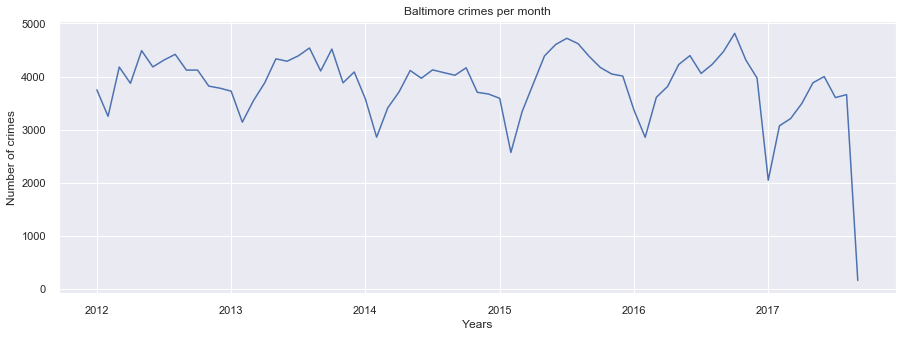

In [244]:
plt.figure(figsize=(15,5))
crimes.resample('M').size().plot(legend=False)
plt.title('Baltimore crimes per month')
plt.xlabel('Years')
plt.ylabel('Number of crimes')
plt.show()

## Rolling sum of all crimes

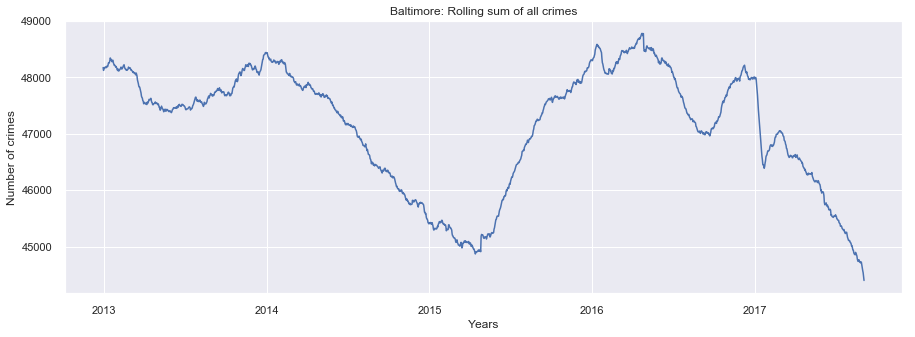

In [245]:
plt.figure(figsize=(15,5))
crimes.resample('D').size().rolling(365).sum().plot()
plt.title('Baltimore: Rolling sum of all crimes')
plt.ylabel('Number of crimes')
plt.xlabel('Years')
plt.show()

## Plot different types of crime (Rolling Sum)

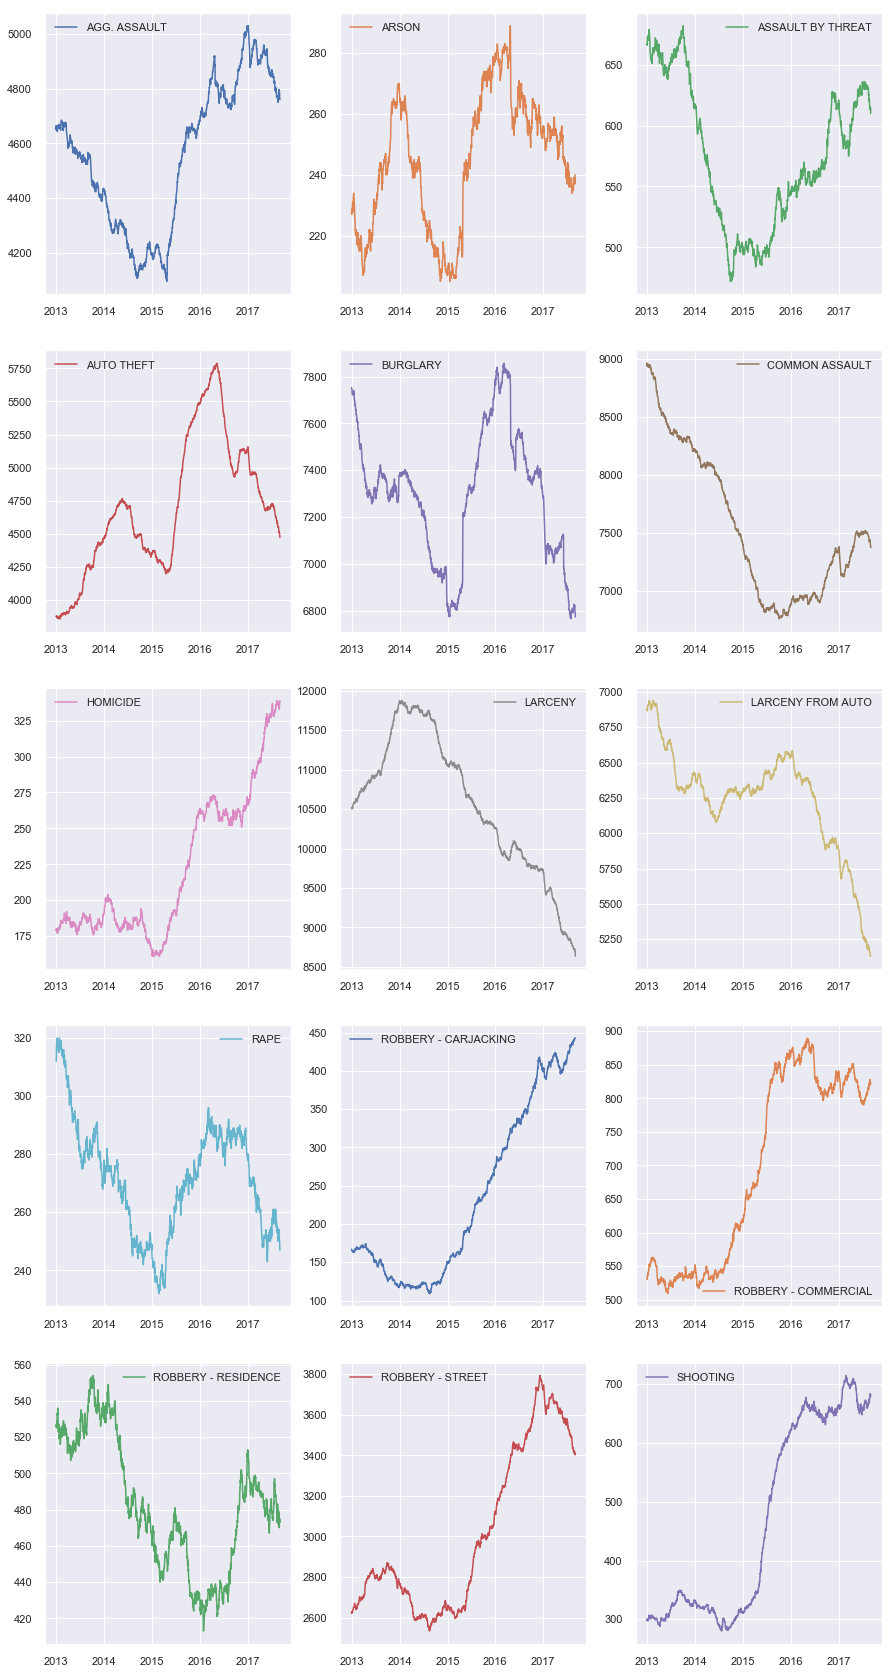

In [246]:
crimes_count_date = crimes.pivot_table('CrimeDate', aggfunc=np.size, columns='Description', index=crimes.index.date, fill_value=0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plo = crimes_count_date.rolling(365).sum().plot(figsize=(15, 30), subplots=True, layout=(-1, 3), sharex=False, sharey=False)

## Number of crimes by month of the year

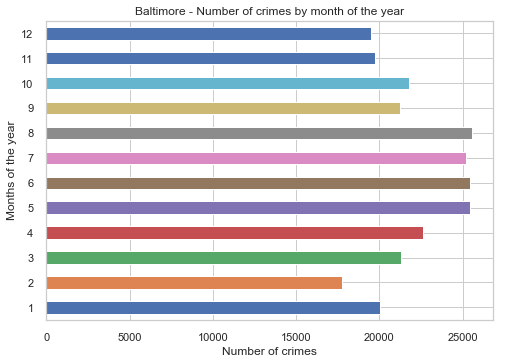

In [304]:
crimes.groupby([crimes.index.month]).size().plot(kind='barh')
plt.ylabel('Months of the year')
plt.xlabel('Number of crimes')
plt.title('Baltimore - Number of crimes by month of the year')
plt.show()

## Number of crimes by type

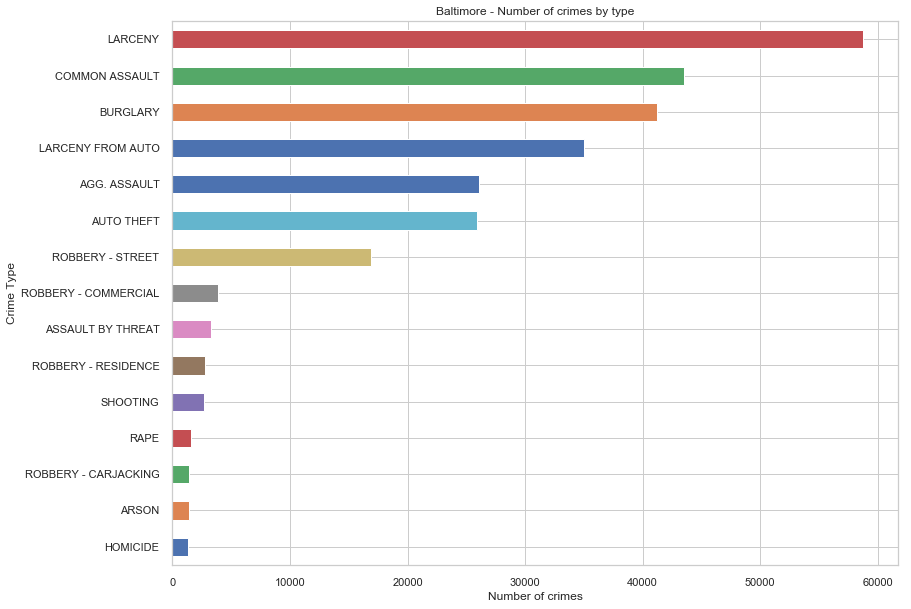

In [305]:
plt.figure(figsize=(13,10))
crimes.groupby([crimes['Description']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Baltimore - Number of crimes by type')
plt.ylabel('Crime Type')
plt.xlabel('Number of crimes')
plt.show()

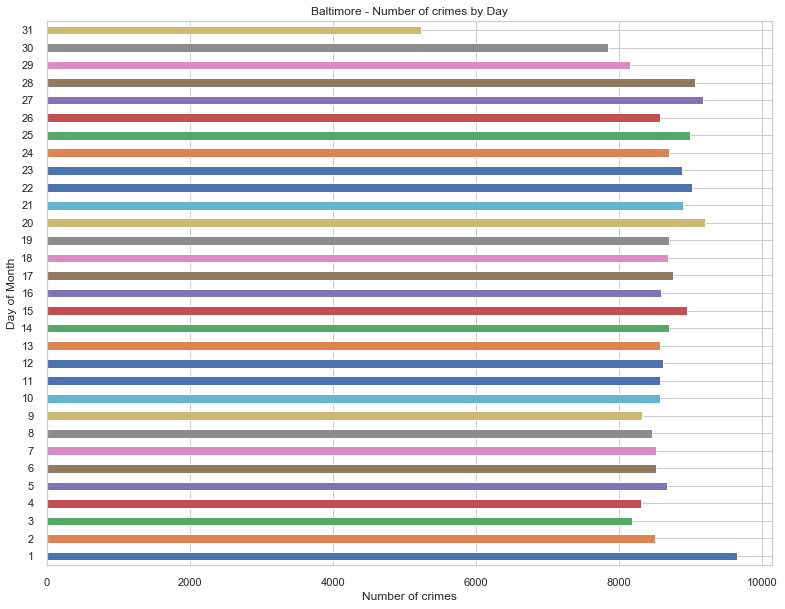

In [315]:
# Number of Crimes by Day
plt.figure(figsize=(13,10))
#crimes.groupby([crimes['day']]).size().sort_values(ascending=True).plot(kind='barh')
crimes.groupby([crimes['day']]).size().plot(kind='barh')
plt.title('Baltimore - Number of crimes by Day')
plt.ylabel('Day of Month')
plt.xlabel('Number of crimes')
plt.show()

## Heatmap - Hour by Crime Type

Text(0.5,1,'Baltimore - Hour by Crime Type')

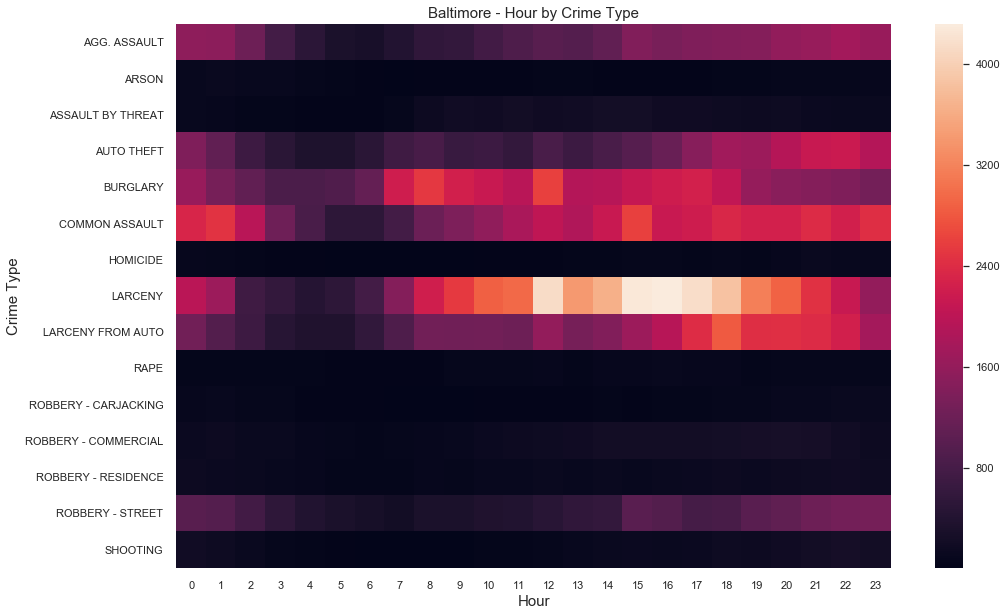

In [308]:
hour_by_type = crimes.pivot_table(values='CrimeDate', index='Description', columns=crimes.index.hour, aggfunc=np.size).fillna(0)

plt.figure(figsize=(16,10))
ax = sns.heatmap(hour_by_type)
ax.set_xlabel('Hour', fontsize=15)
ax.set_ylabel('Crime Type', fontsize=15)
ax.set_title('Baltimore - Hour by Crime Type', fontsize=15)

## Number of crimes by Police District

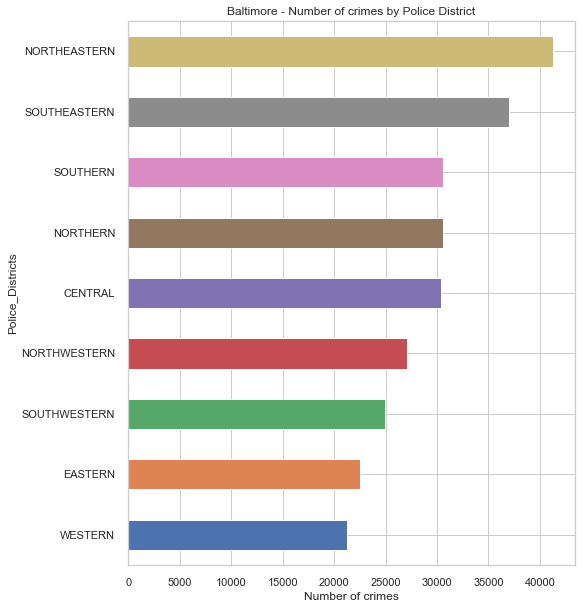

In [321]:
plt.figure(figsize=(8,10))
crimes.groupby([crimes['District']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Baltimore - Number of crimes by Police District')
plt.ylabel('Police_Districts')
plt.xlabel('Number of crimes')
plt.show()

## Heatmap - Hour by District

Text(0.5,1,'Baltimore Hour by District')

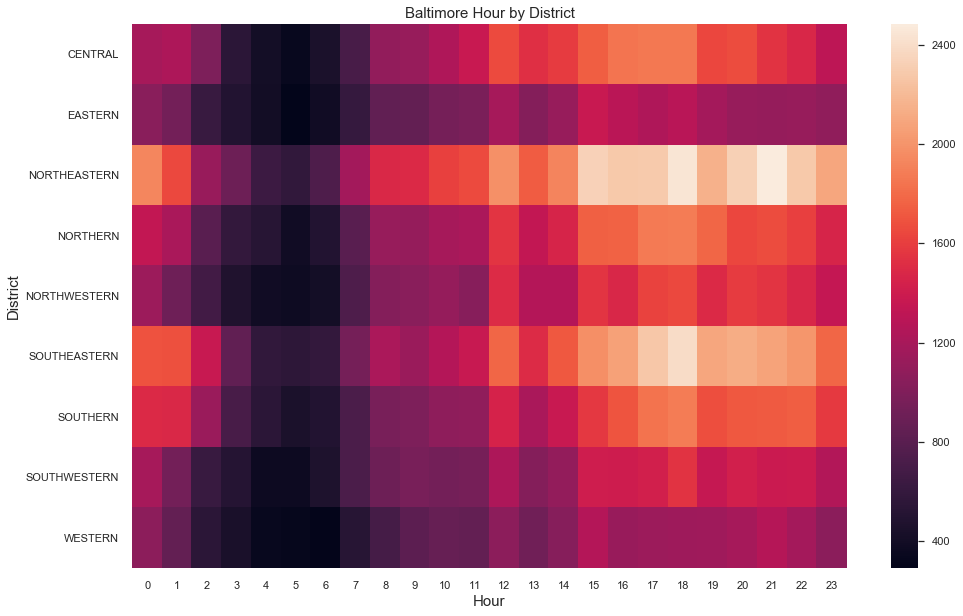

In [322]:
hour_by_location = crimes.pivot_table(values='CrimeDate', index='District', columns=crimes.index.hour, aggfunc=np.size).fillna(0)

plt.figure(figsize=(16,10))
ax = sns.heatmap(hour_by_location)
ax.set_xlabel('Hour', fontsize=15)
ax.set_ylabel('District', fontsize=15)
plt.yticks(rotation='horizontal')
ax.set_title('Baltimore Hour by District', fontsize=15)

## Number of crimes by day of the week

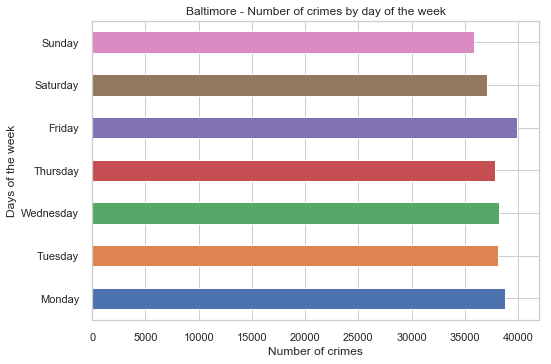

In [306]:
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
crimes.groupby([crimes.index.dayofweek]).size().plot(kind='barh')
plt.ylabel('Days of the week')
plt.yticks(np.arange(7), days)
plt.xlabel('Number of crimes')
plt.title('Baltimore - Number of crimes by day of the week')
plt.show()

## Heatmap - Hour by Week

Text(0.5,1,'Baltimore - Hour by Day of Week')

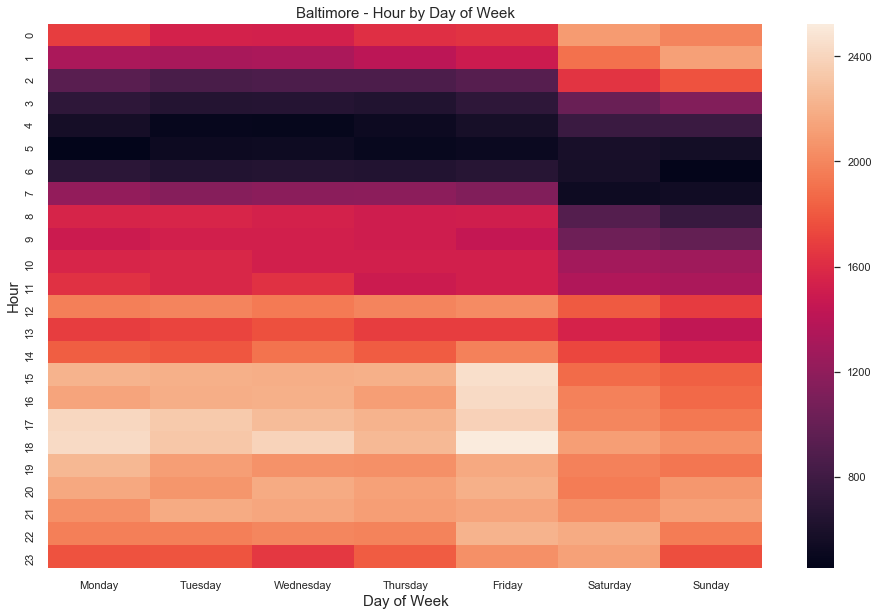

In [318]:
hour_by_week = crimes.pivot_table(values='CrimeDate', index=crimes.index.hour, columns=crimes.index.weekday_name, aggfunc=np.size).fillna(0)
hour_by_week = hour_by_week[days]

plt.figure(figsize=(16,10))
ax = sns.heatmap(hour_by_week)
ax.set_xlabel('Day of Week', fontsize=15)
ax.set_ylabel('Hour', fontsize=15)
ax.set_title('Baltimore - Hour by Day of Week', fontsize=15)

## Reorder columns according to the the order of days

In [254]:
hour_by_week = hour_by_week[days].T 

## Heatmap - Day of Week by Location

Text(0.5,1,'Baltimore - Day of Week by District')

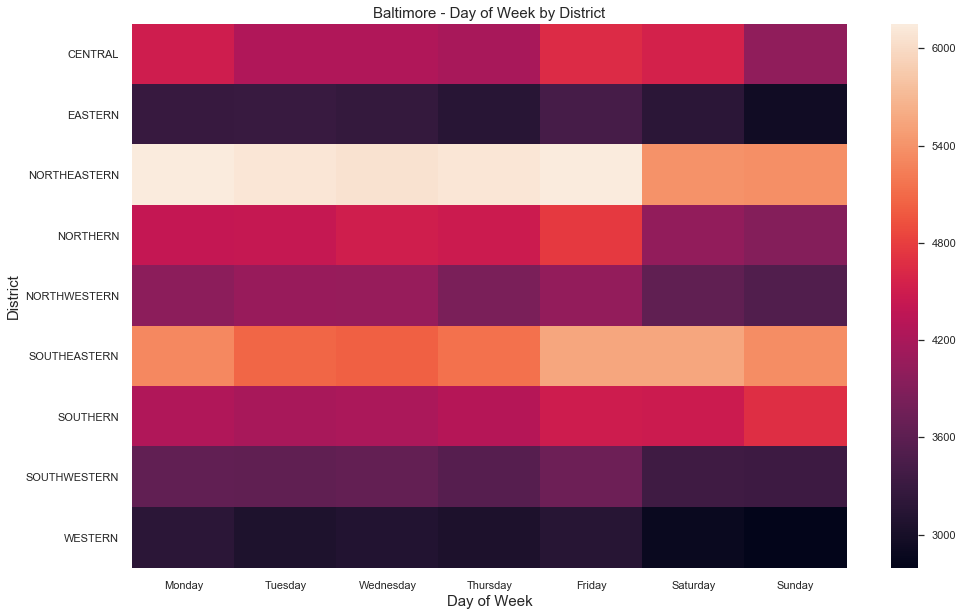

In [320]:
dayofweek_by_location = crimes.pivot_table(values='CrimeDate', index='District', columns=crimes.index.weekday_name, aggfunc=np.size).fillna(0)
dayofweek_by_location = dayofweek_by_location[days]

plt.figure(figsize=(16,10))
ax = sns.heatmap(dayofweek_by_location)
ax.set_xlabel('Day of Week', fontsize=15)
ax.set_ylabel('District', fontsize=15)
plt.yticks(rotation='horizontal')
ax.set_title('Baltimore - Day of Week by District', fontsize=15)

## Heatmap - Day of Week by Type

Text(0.5,1,'Baltimore - Day of Week by Crime Type')

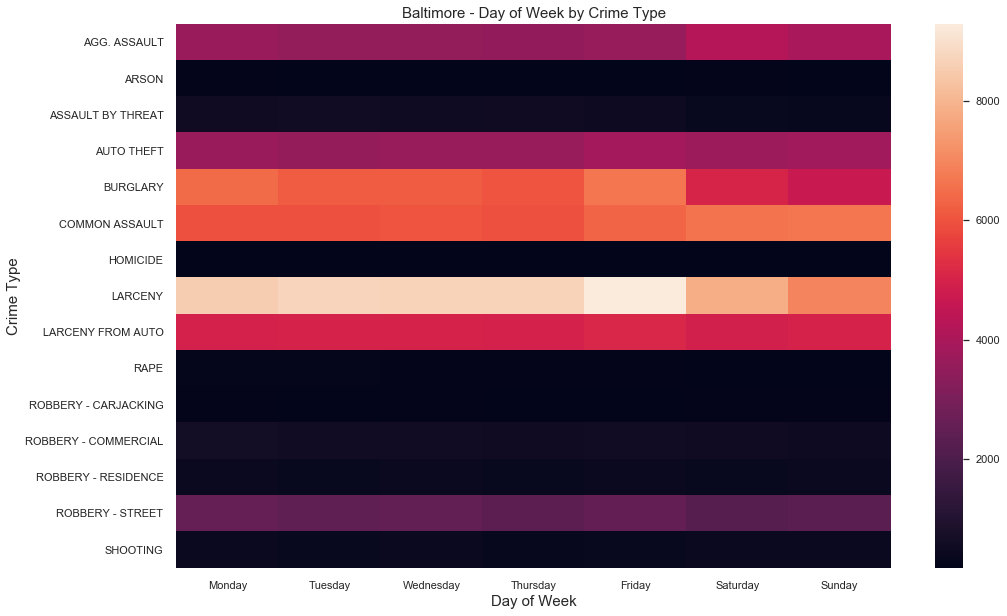

In [319]:
dayofweek_by_type = crimes.pivot_table(values='CrimeDate', index='Description', columns=crimes.index.weekday_name, aggfunc = np.size).fillna(0)
dayofweek_by_type=dayofweek_by_type[days]

plt.figure(figsize=(16,10))
ax = sns.heatmap(dayofweek_by_type)
ax.set_xlabel('Day of Week', fontsize=15)
ax.set_ylabel('Crime Type', fontsize=15)
ax.set_title('Baltimore - Day of Week by Crime Type', fontsize=15)

## Heatmap - Location by Type

Text(0.5,1,'Districts by Crime Type')

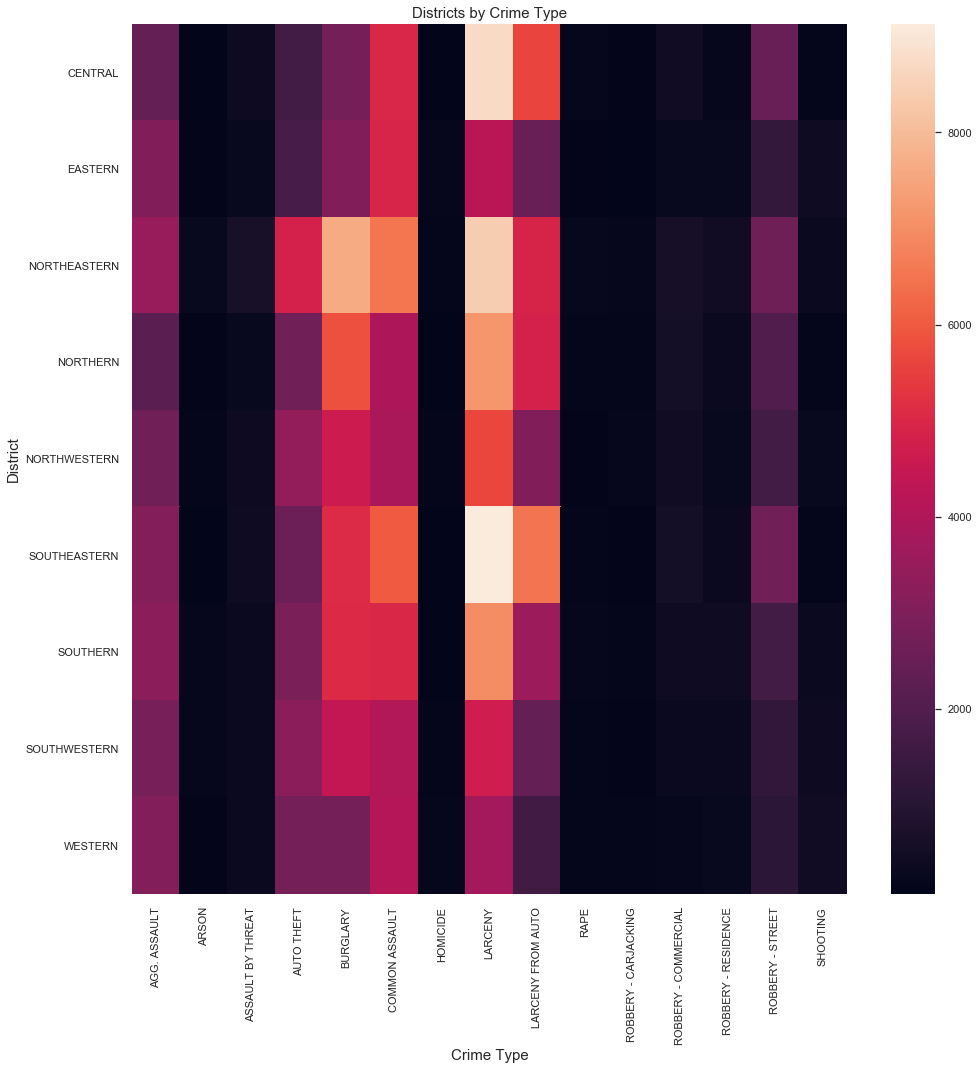

In [257]:
location_by_type  = crimes.pivot_table(values='CrimeDate', index='District', columns='Description', aggfunc=np.size).fillna(0)

plt.figure(figsize=(16,16))
ax = sns.heatmap(location_by_type)
ax.set_xlabel('Crime Type', fontsize=15)
ax.set_ylabel('District', fontsize=15)
plt.yticks(rotation='horizontal')
ax.set_title('Districts by Crime Type', fontsize=15)

# Compare Machine Learning Models in Scikit-learn
# --
## View size of dataframe

In [258]:
crimes.shape

(265694, 9)

In [259]:
crimes.head(1)

,CrimeDate,CrimeCode,Description,District,Premise,month,day,weekday,hour
CrimeDate,,,,,,,,,
2017-09-02 23:30:00,2017-09-02 23:30:00,3JK,ROBBERY - RESIDENCE,SOUTHERN,ROW/TOWNHO,9,2,5,23


In [260]:
# Build a new dataframe called 'crimes_learn'
crimes_learn = crimes.loc[:,('month','day','weekday','hour','Description','District')]
crimes_learn.head(1)

,month,day,weekday,hour,Description,District
CrimeDate,,,,,,
2017-09-02 23:30:00,9,2,5,23,ROBBERY - RESIDENCE,SOUTHERN


In [261]:
# crime type value count
print('Description: ', crimes_learn["Description"].value_counts().size)

Description:  15


## Count column - Type of crime

In [262]:
# Text_General_Code
print('Unique values of Description: ', crimes["Description"].value_counts().size)
print()

# Sort values and count
crimes.groupby('Description').size().sort_values()

Unique values of Description:  15



Description
HOMICIDE                 1299
ARSON                    1388
ROBBERY - CARJACKING     1395
RAPE                     1554
SHOOTING                 2692
ROBBERY - RESIDENCE      2762
ASSAULT BY THREAT        3311
ROBBERY - COMMERCIAL     3906
ROBBERY - STREET        16895
AUTO THEFT              25939
AGG. ASSAULT            26063
LARCENY FROM AUTO       35002
BURGLARY                41197
COMMON ASSAULT          43522
LARCENY                 58769
dtype: int64

# Serialize Crime type

In [263]:
import xlrd
############################
from pathlib import Path
############################

data_folder = Path("baltimore-data/")

serialized_primary_type_dict = {}
wb = xlrd.open_workbook(data_folder / 'crime_type_mapping.xlsx')
sh = wb.sheet_by_index(0)   
for i in range(15):
    cell_value_primary_type = sh.cell(i,0).value
    cell_value_serialized_primary_type = sh.cell(i,1).value
    serialized_primary_type_dict[cell_value_primary_type] = cell_value_serialized_primary_type

In [264]:
#create new serialized column for crime type
crimes_learn['Description'] = crimes_learn['Description'].map(serialized_primary_type_dict)

crimes_learn.head(1)

,month,day,weekday,hour,Description,District
CrimeDate,,,,,,
2017-09-02 23:30:00,9,2,5,23,6.0,SOUTHERN


## Value Count - Type of crime 

In [265]:
# Text_General_Code
print('Unique values of Description: ', crimes_learn["Description"].value_counts().size)
print()

# Sort values and count
crimes_learn.groupby('Description').size().sort_values()

Unique values of Description:  15



Description
1.0      1299
2.0      1388
3.0      1395
4.0      1554
5.0      2692
6.0      2762
7.0      3311
8.0      3906
9.0     16895
10.0    25939
11.0    26063
12.0    35002
13.0    41197
14.0    43522
15.0    58769
dtype: int64

# Reindex dataframe

In [266]:
crimes_learn.index = range(len(crimes_learn))

# Reorganize columns and drop some columns

In [267]:
crimes_learn = crimes_learn[['Description','month','day','weekday','hour','District']]
crimes_learn.head(2)

,Description,month,day,weekday,hour,District
0,6.0,9,2,5,23,SOUTHERN
1,10.0,9,2,5,23,CENTRAL


## Change 'District' to numerical value

In [268]:
# Districts
print('Unique values of Districts: ', crimes["District"].value_counts().size)
print()

# Sort values and count
crimes.groupby('District').size().sort_values()

Unique values of Districts:  9



District
WESTERN         21208
EASTERN         22541
SOUTHWESTERN    24907
NORTHWESTERN    27122
CENTRAL         30401
NORTHERN        30543
SOUTHERN        30627
SOUTHEASTERN    37029
NORTHEASTERN    41316
dtype: int64

## Serialize 'District'

In [269]:
import xlrd
############################
from pathlib import Path
############################

data_folder = Path("baltimore-data/")

serialized_primary_type_dict = {}
wb = xlrd.open_workbook(data_folder / 'crime_type_mapping.xlsx')
sh = wb.sheet_by_index(0)   
for i in range(9):
    cell_value_primary_type = sh.cell(i,6).value
    cell_value_serialized_primary_type = sh.cell(i,7).value
    serialized_primary_type_dict[cell_value_primary_type] = cell_value_serialized_primary_type

In [270]:
#create new serialized column
crimes_learn['District'] = crimes_learn['District'].map(serialized_primary_type_dict)

crimes_learn.head(2)

,Description,month,day,weekday,hour,District
0,6.0,9,2,5,23,7.0
1,10.0,9,2,5,23,5.0


## Value Count - Type of 'District'

In [271]:
# Text_General_Code
print('Unique values of District: ', crimes_learn["District"].value_counts().size)
print()

# Sort values and count
crimes_learn.groupby('District').size().sort_values()

Unique values of District:  9



District
1.0    21208
2.0    22541
3.0    24907
4.0    27122
5.0    30401
6.0    30543
7.0    30627
8.0    37029
9.0    41316
dtype: int64

## Drop rows where 'New_Crime_Code' = 99.0
#### This will keep only the crimes we wish to concentrate on or predict location

In [272]:
# print('Dataset Shape before drop : ', crimes_learn.shape)
# crimes_learn = crimes_learn[crimes_learn['New_Crime_Code'] != 99.0]
# print('Dataset Shape after drop: ', crimes_learn.shape)

In [273]:
crimes_learn.head()

,Description,month,day,weekday,hour,District
0,6.0,9,2,5,23,7.0
1,10.0,9,2,5,23,5.0
2,5.0,9,2,5,22,6.0
3,11.0,9,2,5,22,7.0
4,14.0,9,2,5,22,5.0


## Pairplot

C:\Users\Elitebook 820\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Elitebook 820\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Elitebook 820\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Elitebook 820\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

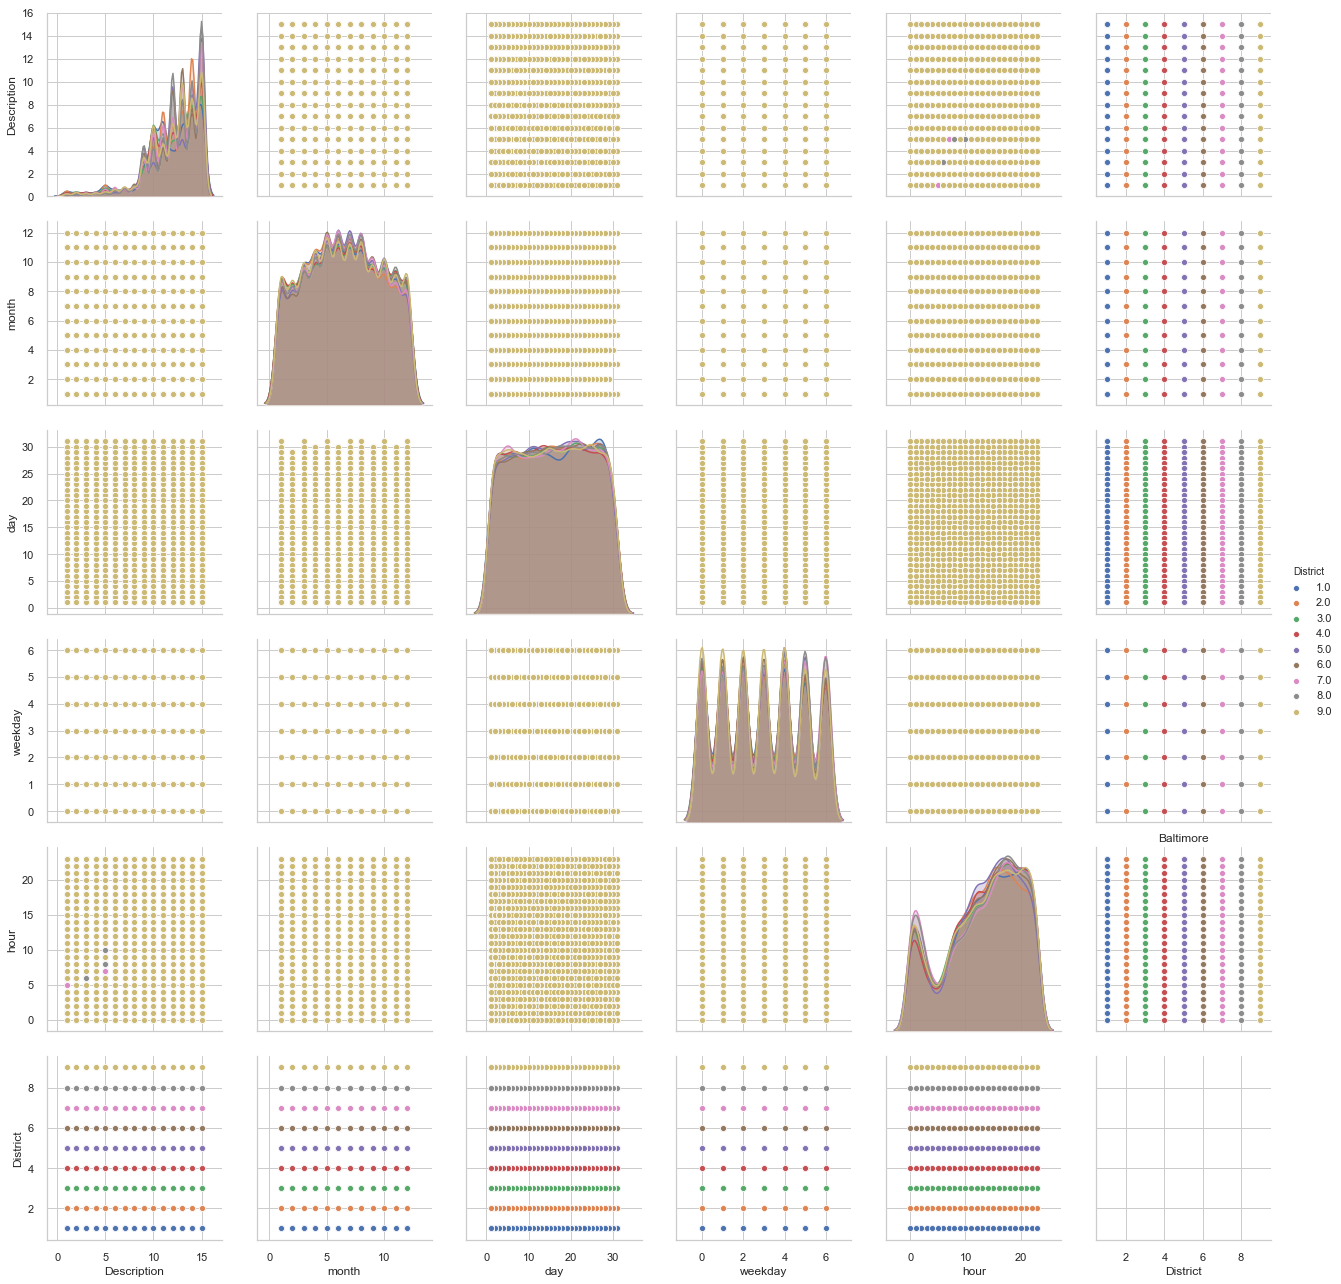

In [274]:
sns.set_style('whitegrid')
sns.pairplot(crimes_learn, hue = 'District', height = 3)
plt.title('Baltimore')
plt.show()

## Univariate analysis

C:\Users\Elitebook 820\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


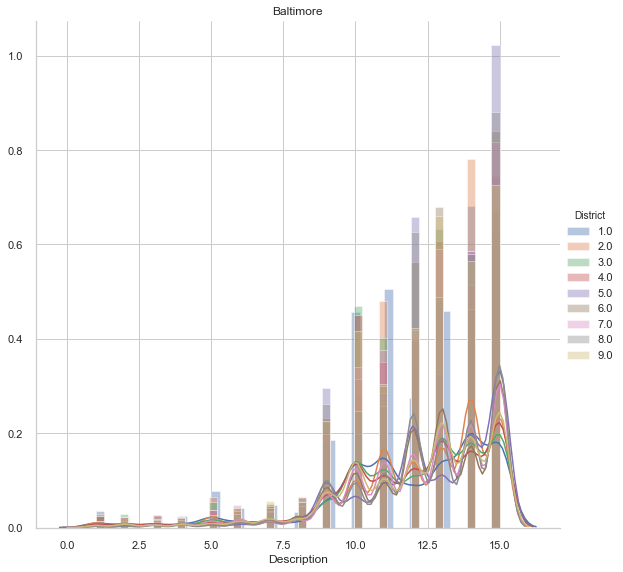

In [275]:
sns.FacetGrid(crimes_learn, hue='District',height=8).map(sns.distplot, 'Description').add_legend()
plt.title('Baltimore')
plt.show()

C:\Users\Elitebook 820\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


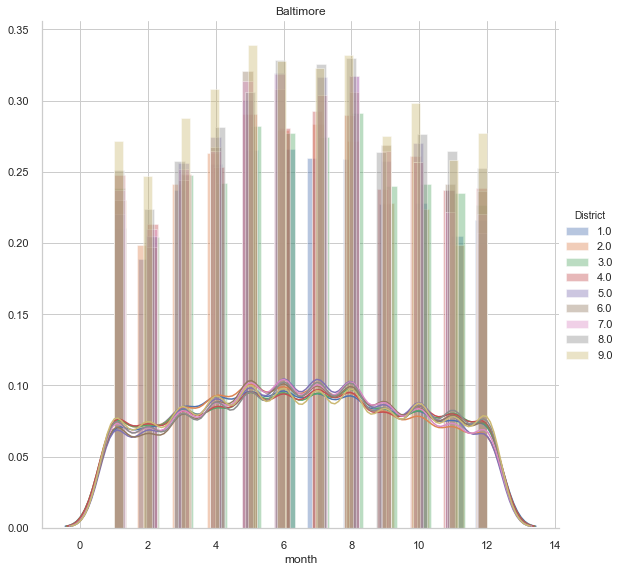

In [276]:
sns.FacetGrid(crimes_learn, hue='District',height=8).map(sns.distplot, 'month').add_legend()
plt.title('Baltimore')
plt.show()

C:\Users\Elitebook 820\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


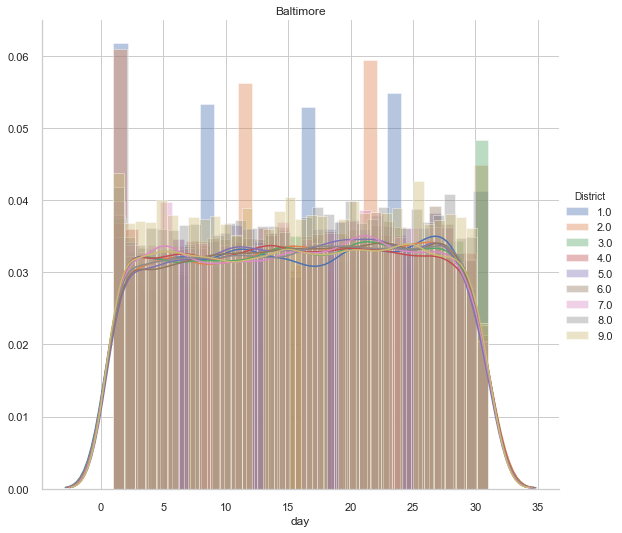

In [277]:
sns.FacetGrid(crimes_learn, hue='District',height=8).map(sns.distplot, 'day').add_legend()
plt.subplots_adjust(top=0.9)
plt.title('Baltimore')
plt.show()

C:\Users\Elitebook 820\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


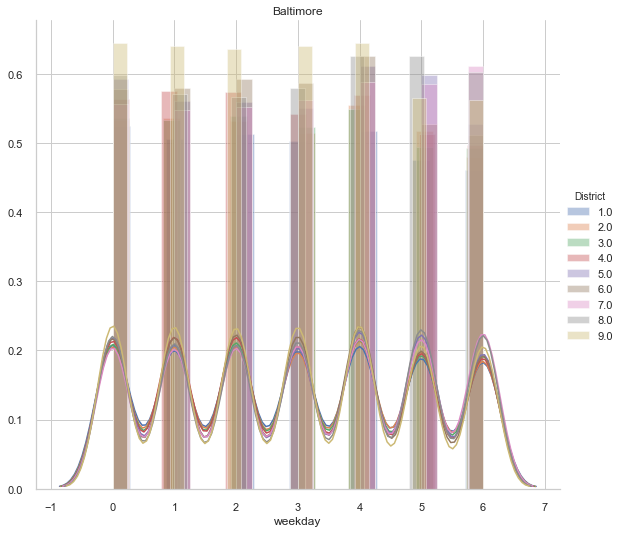

In [278]:
sns.FacetGrid(crimes_learn, hue='District',height=8).map(sns.distplot, 'weekday').add_legend()
plt.subplots_adjust(top=0.9)
plt.title('Baltimore')
plt.show()

C:\Users\Elitebook 820\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


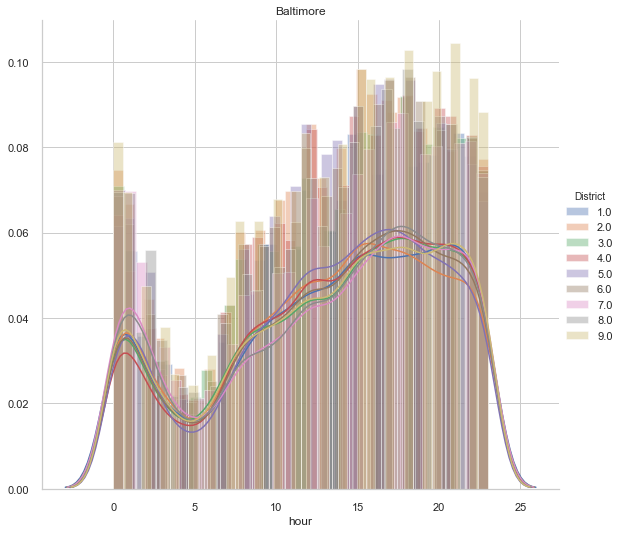

In [279]:
sns.FacetGrid(crimes_learn, hue='District',height=8).map(sns.distplot, 'hour').add_legend()
plt.subplots_adjust(top=0.9)
plt.title('Baltimore')
plt.show()

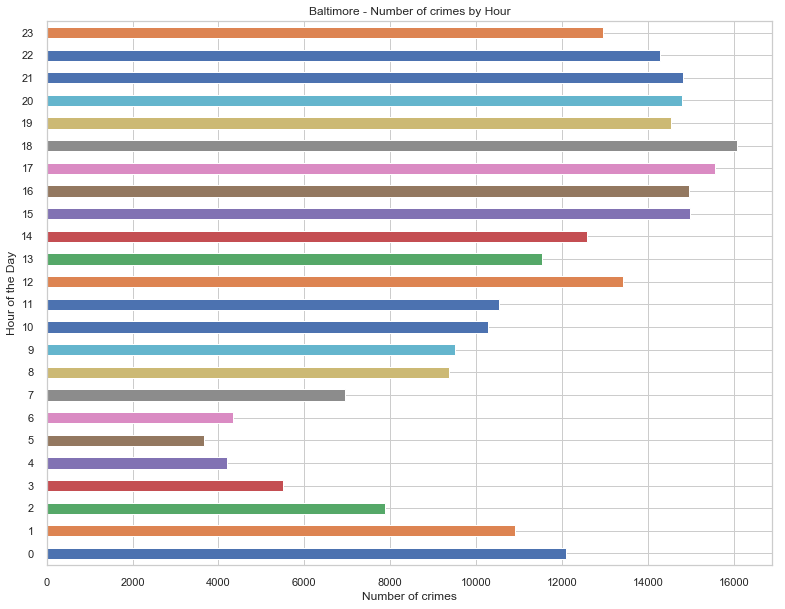

In [316]:
# Number of Crimes by Hour
plt.figure(figsize=(13,10))
crimes.groupby([crimes['hour']]).size().plot(kind='barh')
plt.title('Baltimore - Number of crimes by Hour')
plt.ylabel('Hour of the Day')
plt.xlabel('Number of crimes')
plt.show()

C:\Users\Elitebook 820\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


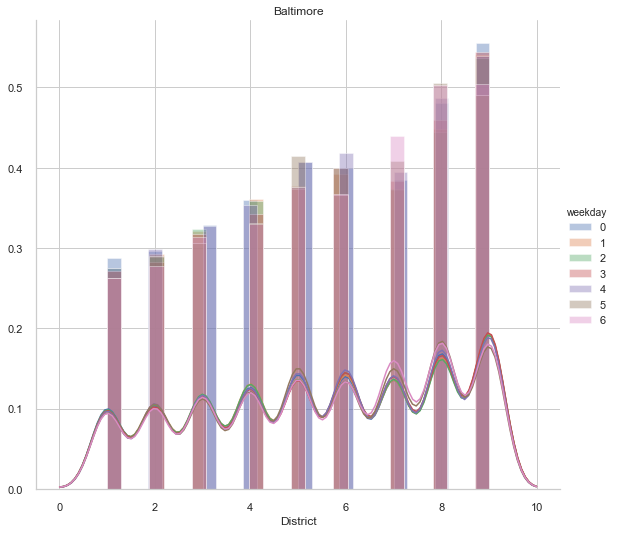

In [280]:
sns.FacetGrid(crimes_learn, hue='weekday',height=8).map(sns.distplot, 'District').add_legend()
plt.subplots_adjust(top=0.9)
plt.title('Baltimore')
plt.show()

## Value Counts

In [310]:
# Value Counts 

print('Description: ', crimes_learn["Description"].value_counts().size)
print()

print('month: ', crimes_learn["month"].value_counts().size)
print()

print('weekday: ', crimes_learn["weekday"].value_counts().size)
print()

print('hour: ', crimes_learn["hour"].value_counts().size)
print()

print('District: ', crimes_learn["District"].value_counts().size)

Description:  15

month:  12

weekday:  7

hour:  24

District:  9


## Drop 'day' column

In [281]:
crimes_learn = crimes_learn[['Description','month','weekday','hour','District']]
crimes_learn.head(2)

,Description,month,weekday,hour,District
0,6.0,9,5,23,7.0
1,10.0,9,5,23,5.0


# Modeling with Scikit-learn

In [282]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import pickle

## Split the dataset into a training set and a testing set

In [283]:
# X = crimes_learn.drop(['District'], axis=1)
# y = crimes_learn['District']
# print(X.head(2))
# print(X.shape,'\n')
# print(y.head(2))
# print(y.shape)

## Inspired by: 
#### https://machinelearningmastery.com/machine-learning-in-python-step-by-step/

In [284]:
# create a Validation Dataset
X = crimes_learn.drop(['District'], axis=1)
Y = crimes_learn['District']
print(X.head(2))
print("X.shape ", X.shape,'\n')
print(Y.head(2))
print("Y.shape ", Y.shape)

# Split-out validation dataset
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

   Description  month  weekday  hour
0          6.0      9        5    23
1         10.0      9        5    23
X.shape  (265694, 4) 

0    7.0
1    5.0
Name: District, dtype: float64
Y.shape  (265694,)


In [285]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [286]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## Let’s evaluate several algorithms:

In [287]:
# Build Models
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

C:\Users\Elitebook 820\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Elitebook 820\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Elitebook 820\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Elitebook 820\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Elitebook 820\Anaconda3\lib\site-packages\sklearn\linear_model\lo

LR: 0.157827 (0.002602)
LDA: 0.157874 (0.002660)
KNN: 0.131604 (0.002888)
CART: 0.148169 (0.002069)
NB: 0.157070 (0.002945)


## Compare Algorithms

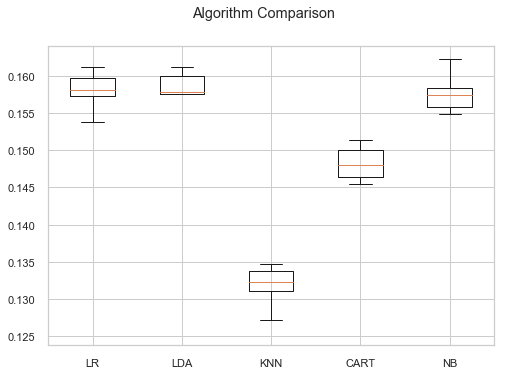

In [288]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Make Predictions

In [289]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)

print("KNeighborsClassifier")
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

KNeighborsClassifier
0.13381885244359135
[[ 802  579  493  380  352  305  365  444  572]
 [ 681  691  481  411  428  371  390  480  536]
 [ 823  602  676  480  412  458  446  466  636]
 [ 800  721  566  637  444  474  448  580  698]
 [ 920  746  578  546  810  530  441  782  678]
 [ 857  764  636  647  604  675  493  768  736]
 [ 943  790  625  575  606  555  622  662  750]
 [1024  960  759  735  737  670  628 1033  925]
 [1189 1066  876  832  730  754  711  878 1165]]
              precision    recall  f1-score   support

         1.0       0.10      0.19      0.13      4292
         2.0       0.10      0.15      0.12      4469
         3.0       0.12      0.14      0.13      4999
         4.0       0.12      0.12      0.12      5368
         5.0       0.16      0.13      0.15      6031
         6.0       0.14      0.11      0.12      6180
         7.0       0.14      0.10      0.12      6128
         8.0       0.17      0.14      0.15      7471
         9.0       0.17      0.14      

In [290]:
# Make predictions on validation dataset
lr = LogisticRegression()
lr.fit(X_train, Y_train)
predictions = lr.predict(X_validation)

print("LogisticRegression")
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

C:\Users\Elitebook 820\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Elitebook 820\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression
0.15634468093114284
[[   0    0    0    0    0    0    0  784 3508]
 [   0    0    0    0    0    0    0  847 3622]
 [   0    0    0    0    0    0    0  849 4150]
 [   0    0    0    0    0    0    0  954 4414]
 [   0    0    0    0    0    0    0 1288 4743]
 [   0    0    0    0    0    0    0 1230 4950]
 [   0    0    0    0    0    0    0 1286 4842]
 [   0    0    0    0    0    0    0 1578 5893]
 [   0    0    0    0    0    0    0 1471 6730]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00      4292
         2.0       0.00      0.00      0.00      4469
         3.0       0.00      0.00      0.00      4999
         4.0       0.00      0.00      0.00      5368
         5.0       0.00      0.00      0.00      6031
         6.0       0.00      0.00      0.00      6180
         7.0       0.00      0.00      0.00      6128
         8.0       0.15      0.21      0.18      7471
         9.0       0.16      0.82      0.

C:\Users\Elitebook 820\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [291]:
# Make predictions on validation dataset
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
predictions = lda.predict(X_validation)

print("LinearDiscriminantAnalysis")
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

LinearDiscriminantAnalysis
0.15647641092229814
[[   0    0    0    0    0    0    0  757 3535]
 [   0    0    0    0    0    0    0  809 3660]
 [   0    0    0    0    0    0    0  816 4183]
 [   0    0    0    0    0    0    0  934 4434]
 [   0    0    0    0    0    0    0 1251 4780]
 [   0    0    0    0    0    0    0 1191 4989]
 [   0    0    0    0    0    0    0 1244 4884]
 [   0    0    0    0    0    0    0 1534 5937]
 [   0    0    0    0    0    0    0 1420 6781]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00      4292
         2.0       0.00      0.00      0.00      4469
         3.0       0.00      0.00      0.00      4999
         4.0       0.00      0.00      0.00      5368
         5.0       0.00      0.00      0.00      6031
         6.0       0.00      0.00      0.00      6180
         7.0       0.00      0.00      0.00      6128
         8.0       0.15      0.21      0.18      7471
         9.0       0.16      0.83

C:\Users\Elitebook 820\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [292]:
# Make predictions on validation dataset
cart = DecisionTreeClassifier()
cart.fit(X_train, Y_train)
predictions = cart.predict(X_validation)

print("DecisionTreeClassifier")
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

DecisionTreeClassifier
0.15393590395001788
[[ 518  421  406  399  493  386  402  549  718]
 [ 384  539  413  405  562  439  442  591  694]
 [ 472  393  627  502  542  492  453  595  923]
 [ 424  410  480  675  665  531  502  729  952]
 [ 454  468  376  511 1196  627  508  983  908]
 [ 428  437  496  621  842  857  525  907 1067]
 [ 485  475  512  560  851  659  710  847 1029]
 [ 498  548  597  632 1136  764  655 1416 1225]
 [ 649  635  782  781  988  876  720 1128 1642]]
              precision    recall  f1-score   support

         1.0       0.12      0.12      0.12      4292
         2.0       0.12      0.12      0.12      4469
         3.0       0.13      0.13      0.13      4999
         4.0       0.13      0.13      0.13      5368
         5.0       0.16      0.20      0.18      6031
         6.0       0.15      0.14      0.15      6180
         7.0       0.14      0.12      0.13      6128
         8.0       0.18      0.19      0.19      7471
         9.0       0.18      0.20    

In [293]:
# Make predictions on validation dataset
nb = GaussianNB()
nb.fit(X_train, Y_train)
predictions = nb.predict(X_validation)

print("GaussianNB")
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

GaussianNB
0.1555354824140462
[[ 211    0    0    0    0    0    0 1120 2961]
 [ 222    0    0    0    0    0    0 1226 3021]
 [ 234    0    0    0    0    0    0 1251 3514]
 [ 189    0    0    0    0    0    0 1375 3804]
 [ 147    0    0    0    0    0    0 1740 4144]
 [ 146    0    0    0    0    0    0 1736 4298]
 [ 193    0    0    0    0    0    0 1823 4112]
 [ 142    0    0    0    0    0    0 2244 5085]
 [ 259    0    0    0    0    0    0 2132 5810]]
              precision    recall  f1-score   support

         1.0       0.12      0.05      0.07      4292
         2.0       0.00      0.00      0.00      4469
         3.0       0.00      0.00      0.00      4999
         4.0       0.00      0.00      0.00      5368
         5.0       0.00      0.00      0.00      6031
         6.0       0.00      0.00      0.00      6180
         7.0       0.00      0.00      0.00      6128
         8.0       0.15      0.30      0.20      7471
         9.0       0.16      0.71      0.26      8

C:\Users\Elitebook 820\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [294]:
# # Split the dataset into a training set and a testing set
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
# print(X_train.shape)
# print(X_test.shape)
# print()
# print(y_train.shape)
# print(y_test.shape)

## Logistic Regression

In [295]:
# # train the model on the training set
# logreg = LogisticRegression()
# logreg.fit(X_train, y_train)

In [296]:
# # save the model to disk (Pickle)
# filename = 'finalized_Philadelphia_LR_model.sav'
# pickle.dump(logreg, open(filename, 'wb'))

## Accuracy score

In [297]:
# # make predictions on the training set
# y_pred = logreg.predict(X_test)

# # compare actual response values (y_test) with predicted response values (y_pred)
# print(metrics.accuracy_score(y_test, y_pred))

## K Nearest Neighbors - Optimize k value

In [298]:
# k_range = list(range(1,26))
# scores = []
# for k in k_range:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     knn.fit(X_train, y_train)
#     y_pred = knn.predict(X_test)
#     scores.append(metrics.accuracy_score(y_test, y_pred))

## Plot the relationship between k and testing accuracy

In [299]:
# plt.plot(k_range, scores)
# plt.xlabel('Value of k for KNN')
# plt.ylabel('Accuracy Score')
# plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
# plt.show()

# Choosing KNN to Model Ward Prediction with k = ?????
### After seeing that a value of k = 12 is a pretty good number of neighbors for this model, I used it to fit the model for the entire dataset instead of just the training set.

In [300]:
# # instantiate the model with the best known parameters
# knn = KNeighborsClassifier(n_neighbors=12)

# # train the model with X and y (not X_train and y_train)
# knn.fit(X, y)

# #PICKLE
# # save the model to disk (pickle)
# filename = 'finalized_Philadelphia_KNN_model.sav'
# pickle.dump(knn, open(filename, 'wb'))

## Make prediction on out-of-sample data

In [301]:
# # make a prediction for an example of an out-of-sample observation
# # predict Ward from knn.predict([['New_Crime_Code','month','weekday','hour','Police_Districts']])
# knn.predict([[17.0,3,5,12]])

In [302]:
# knn.predict([[2.0,2,2,23]])